
# Project: Investigate The Movie Database Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


> There are over 10,000 different movies within this dataset. The dependent variable we will be looking at is revenue_adj and the independent variables are budget_adj, runtime, vote_average.

>The questions I will be answering are the following: Which Genres were popular from year to year?
What kinds of properties are associated with movies that have high revenues?

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

pd.set_option('display.float_format', lambda x: '%.5f' % x)



<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [137]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,tt1392190,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,tt2908446,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,tt2488496,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,tt2820852,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052


In [138]:
df.shape

(10866, 21)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [140]:
df = df[df['genres'].notna()]

In [141]:
df.drop(['imdb_id','homepage','tagline',], axis=1, inplace=True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 18 columns):
id                      10843 non-null int64
popularity              10843 non-null float64
budget                  10843 non-null int64
revenue                 10843 non-null int64
original_title          10843 non-null object
cast                    10768 non-null object
director                10801 non-null object
keywords                9368 non-null object
overview                10840 non-null object
runtime                 10843 non-null int64
genres                  10843 non-null object
production_companies    9827 non-null object
release_date            10843 non-null object
vote_count              10843 non-null int64
vote_average            10843 non-null float64
release_year            10843 non-null int64
budget_adj              10843 non-null float64
revenue_adj             10843 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 1.6+ MB



### Data Cleaning (Replace this with more specific notes!)

> I dropped the columns, 'imdb_id','homepage','tagline' as I deemed them unnecessary. I also dropped rows that did not specify a genre because my analysis requires a genre and only 26 out of 10,000+ were missing so nothing to large was dropped.

> Further along, I drop around 6k rows that have 0 as their revenue_adj in order to properly answer my second question. I only used that dataframe for the second question, not the first


In [143]:
#I find here what the oldest movie is and what the newest movie is.

df.head()
df['release_year'].max()
df['release_year'].min()

1960

<a id='eda'></a>
## Exploratory Data Analysis



### Which Genres were popular from year to year?

In [144]:
#I am making a new dataframe per decade.

df_1960s = df.loc[df['release_year'] <1970]
df_1970s = df.loc[(df['release_year'] >= 1970) & (df['release_year'] < 1980)]
df_1980s = df.loc[(df['release_year'] >= 1980) & (df['release_year'] < 1990)]
df_1990s = df.loc[(df['release_year'] >= 1990) & (df['release_year'] < 2000)]
df_2000s = df.loc[(df['release_year'] >= 2000) & (df['release_year'] < 2010)]
df_2010s = df.loc[df['release_year'] >2010]

Text(0,0.5,'Movie Count')

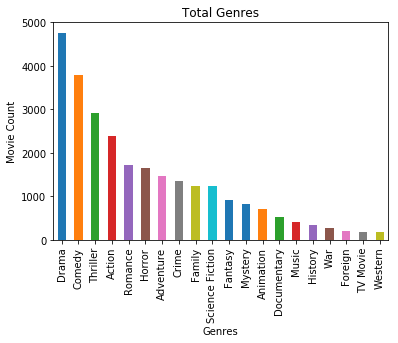

In [145]:
#I am creating a bar graph showing the totals of each Genre.

ax = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).plot(kind='bar', title = "Total Genres")
ax.set_xlabel("Genres")
ax.set_ylabel("Movie Count")

Text(0,0.5,'Movie Count')

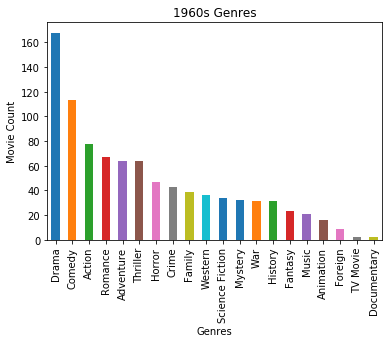

In [146]:
#Bar graph for counts of genre for the 1960s

ax = pd.Series(df_1960s['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).plot(kind='bar', title = "1960s Genres")
ax.set_xlabel("Genres")
ax.set_ylabel("Movie Count")

Text(0,0.5,'Movie Count')

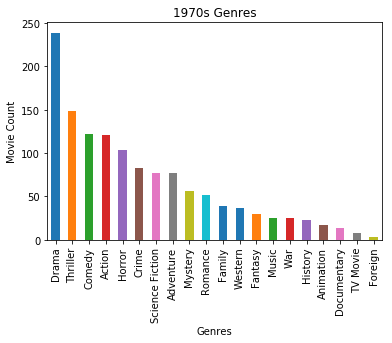

In [147]:
#Bar graph for counts of genre for the 1970s

ax= pd.Series(df_1970s['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).plot(kind='bar', title = "1970s Genres")
ax.set_xlabel("Genres")
ax.set_ylabel("Movie Count")

Text(0,0.5,'Movie Count')

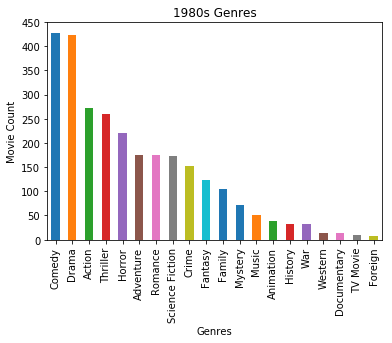

In [148]:
#Bar graph for counts of genre for the 1980s

ax = pd.Series(df_1980s['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).plot(kind='bar', title = "1980s Genres")
ax.set_xlabel("Genres")
ax.set_ylabel("Movie Count")

Text(0,0.5,'Movie Count')

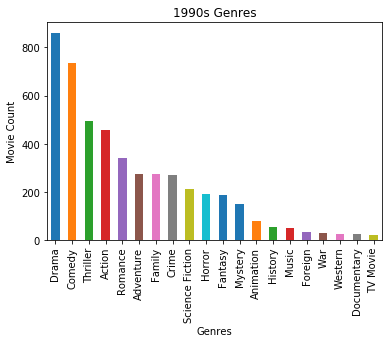

In [149]:
#Bar graph for counts of genre for the 1990s

ax = pd.Series(df_1990s['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).plot(kind='bar', title = "1990s Genres")
ax.set_xlabel("Genres")
ax.set_ylabel("Movie Count")

Text(0,0.5,'Movie Count')

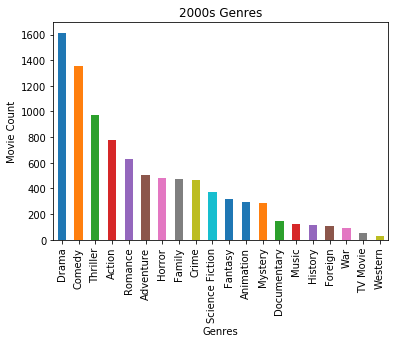

In [150]:
#Bar graph for counts of genre for the 2000s

ax = pd.Series(df_2000s['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).plot(kind='bar', title = "2000s Genres")
ax.set_xlabel("Genres")
ax.set_ylabel("Movie Count")

Text(0,0.5,'Movie Count')

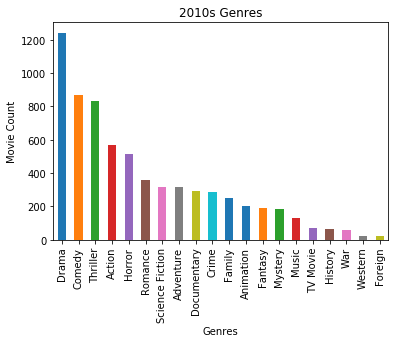

In [151]:
#Bar graph for counts of genre for the 2010s

ax= pd.Series(df_2010s['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).plot(kind='bar', title = "2010s Genres")
ax.set_xlabel("Genres")
ax.set_ylabel("Movie Count")

In [152]:
#Creating a new dataframe that splits the genres up

new_df = pd.DataFrame(df.genres.str.split('|').tolist(), index=df.id).stack()
new_df = new_df.reset_index([0, 'id'])

In [153]:
#Merging the dataframe I just made into the original one in order to properly have the rest of the values/columns in a new data frame 

df_again = df[['id','release_year','popularity']]
df_final = pd.merge(df_again,new_df)
df_final = df_final.rename(columns={0:"genres"})


In [154]:
#Splitting up the decades again, I am doing this so I can compare genres and popularity.

df_1960s_new = df_final.loc[df_final['release_year'] <1970]
df_1970s_new = df_final.loc[(df_final['release_year'] >= 1970) & (df_final['release_year'] < 1980)]
df_1980s_new = df_final.loc[(df_final['release_year'] >= 1980) & (df_final['release_year'] < 1990)]
df_1990s_new = df_final.loc[(df_final['release_year'] >= 1990) & (df_final['release_year'] < 2000)]
df_2000s_new = df_final.loc[(df_final['release_year'] >= 2000) & (df_final['release_year'] < 2010)]
df_2010s_new = df_final.loc[df_final['release_year'] >2010]

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


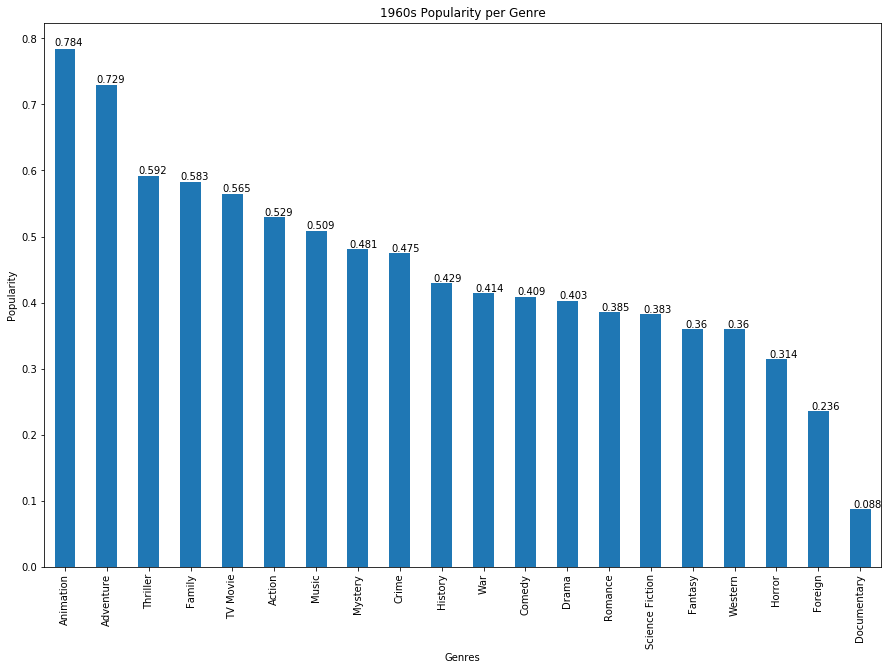

In [155]:
#Creating a bar graph for the genres in the 1960s using popularity as the y axis.

df_1960s_new.drop(['id','release_year'], axis=1, inplace=True)
df_1960s_new_new = df_1960s_new.groupby(['genres']).mean()
df_1960s_new_new.sort_values('popularity',ascending=False,inplace=True)
df_1960s_new_new = df_1960s_new_new.round(3)
ax_1960 = df_1960s_new_new.plot(kind='bar', figsize=(15,10), title = "1960s Popularity per Genre", legend=None)
ax_1960.set_xlabel("Genres")
ax_1960.set_ylabel("Popularity")
for p in ax_1960.patches:
    ax_1960.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


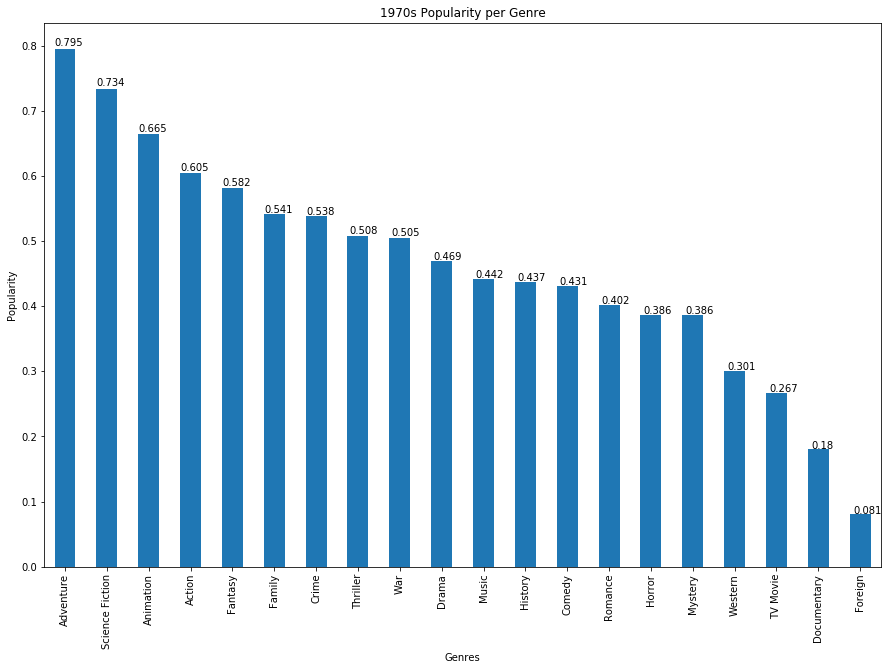

In [156]:
#Creating a bar graph for the genres in the 1970s using popularity as the y axis.

df_1970s_new.drop(['id','release_year'], axis=1, inplace=True)
df_1970s_new_new = df_1970s_new.groupby(['genres']).mean()
df_1970s_new_new.sort_values('popularity',ascending=False,inplace=True)
df_1970s_new_new = df_1970s_new_new.round(3)
ax_1970 = df_1970s_new_new.plot(kind='bar', figsize=(15,10), title = "1970s Popularity per Genre", legend=None)
ax_1970.set_xlabel("Genres")
ax_1970.set_ylabel("Popularity")
for p in ax_1970.patches:
    ax_1970.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


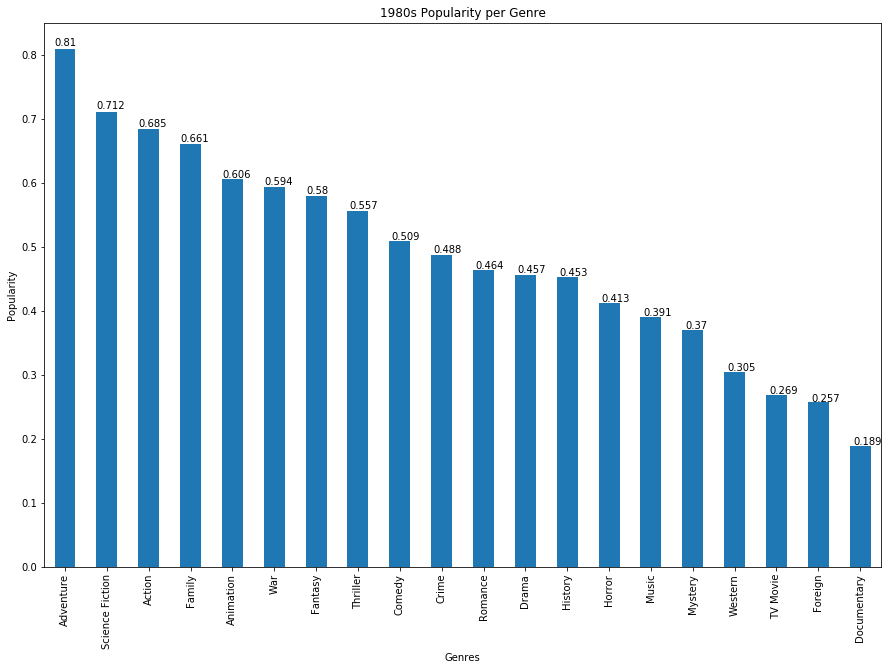

In [157]:
#Creating a bar graph for the genres in the 1980s using popularity as the y axis.

df_1980s_new.drop(['id','release_year'], axis=1, inplace=True)
df_1980s_new_new = df_1980s_new.groupby(['genres']).mean()
df_1980s_new_new.sort_values('popularity',ascending=False,inplace=True)
df_1980s_new_new = df_1980s_new_new.round(3)
ax_1980 = df_1980s_new_new.plot(kind='bar', figsize=(15,10), title = "1980s Popularity per Genre", legend=None)
ax_1980.set_xlabel("Genres")
ax_1980.set_ylabel("Popularity")
for p in ax_1980.patches:
    ax_1980.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


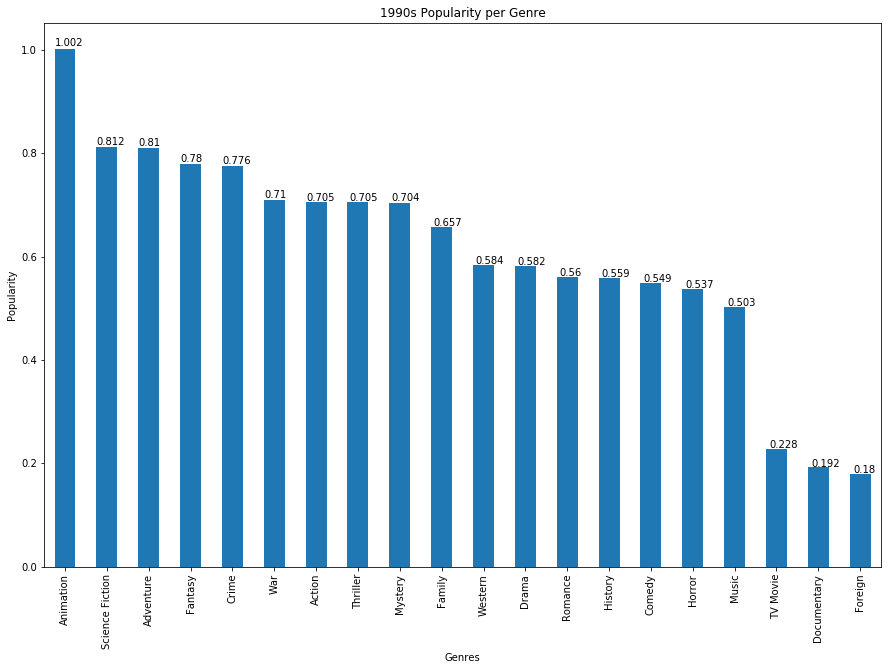

In [158]:
#Creating a bar graph for the genres in the 1990s using popularity as the y axis.

df_1990s_new.drop(['id','release_year'], axis=1, inplace=True)
df_1990s_new_new = df_1990s_new.groupby(['genres']).mean()
df_1990s_new_new.sort_values('popularity',ascending=False,inplace=True)
df_1990s_new_new = df_1990s_new_new.round(3)
ax_1990 = df_1990s_new_new.plot(kind='bar', figsize=(15,10), title = "1990s Popularity per Genre", legend=None)
ax_1990.set_xlabel("Genres")
ax_1990.set_ylabel("Popularity")
for p in ax_1990.patches:
    ax_1990.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


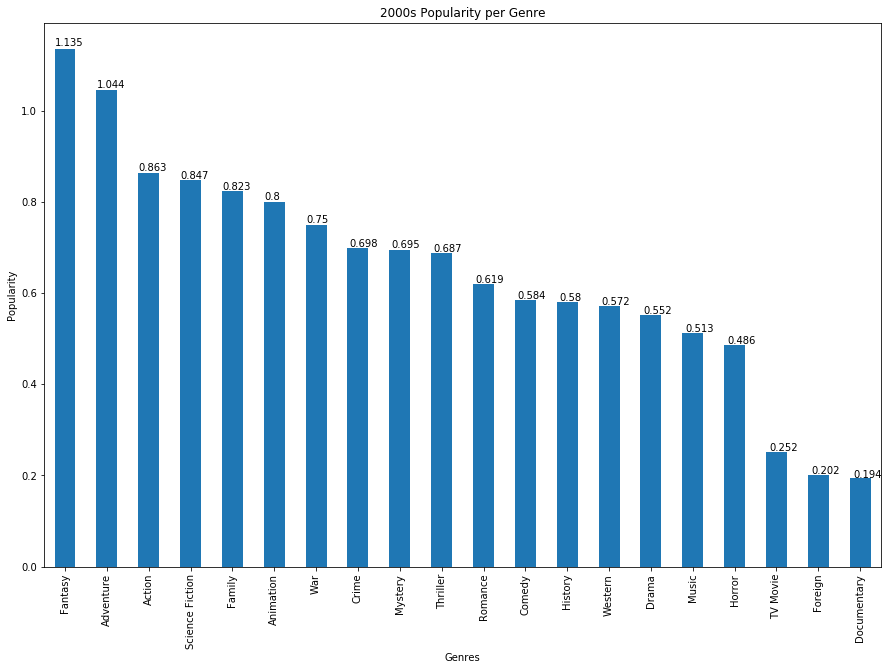

In [159]:
#Creating a bar graph for the genres in the 2000s using popularity as the y axis.

df_2000s_new.drop(['id','release_year'], axis=1, inplace=True)
df_2000s_new_new = df_2000s_new.groupby(['genres']).mean()
df_2000s_new_new.sort_values('popularity',ascending=False,inplace=True)
df_2000s_new_new = df_2000s_new_new.round(3)
ax_2000 = df_2000s_new_new.plot(kind='bar', figsize=(15,10), title = "2000s Popularity per Genre", legend=None)
ax_2000.set_xlabel("Genres")
ax_2000.set_ylabel("Popularity")
for p in ax_2000.patches:
    ax_2000.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


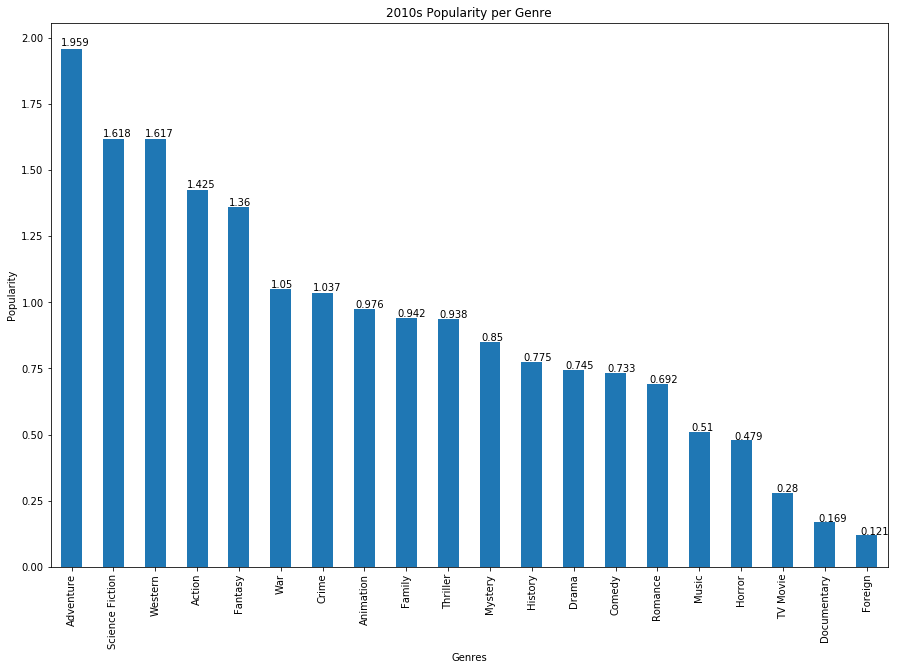

In [160]:
#Creating a bar graph for the genres in the 2010s using popularity as the y axis.

df_2010s_new.drop(['id','release_year'], axis=1, inplace=True)
df_2010s_new_new = df_2010s_new.groupby(['genres']).mean()
df_2010s_new_new.sort_values('popularity',ascending=False,inplace=True)
df_2010s_new_new = df_2010s_new_new.round(3)
ax_2010 = df_2010s_new_new.plot(kind='bar', figsize=(15,10), title = "2010s Popularity per Genre", legend=None)
ax_2010.set_xlabel("Genres")
ax_2010.set_ylabel("Popularity")
for p in ax_2010.patches:
    ax_2010.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Text(0,0.5,'Popularity')

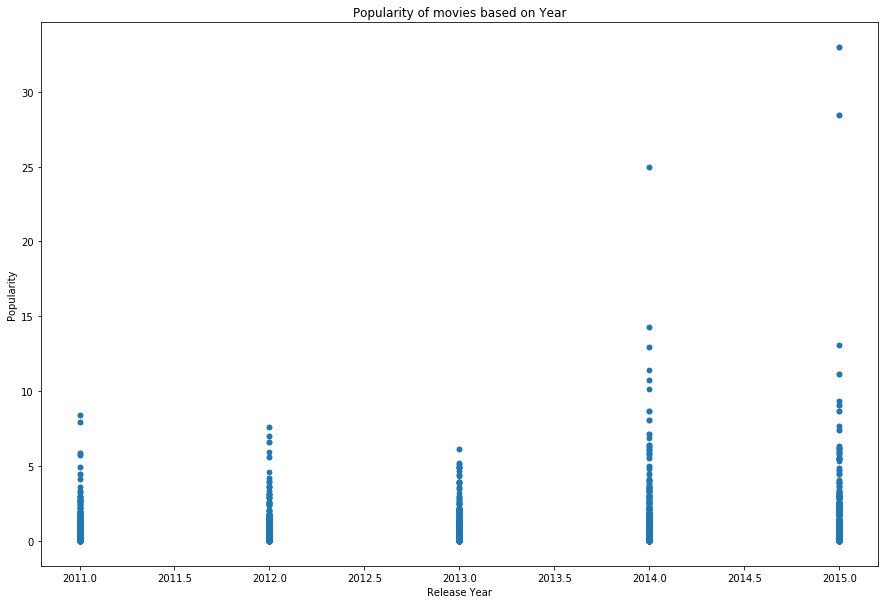

In [161]:
#Creating a SCATTER plot graph for the genres in the 2010s using popularity as the y axis.

df_2010s_new = df_final.loc[df_final['release_year'] >2010]
ax_2010 = df_2010s_new.plot(kind='scatter', figsize=(15,10), title = "Popularity of movies based on Year", x = 'release_year', y = 'popularity')
ax_2010.set_xlabel("Release Year")
ax_2010.set_ylabel("Popularity")


### Answering the question: Which Genres were popular from year to year?

Answering the question of Genres. I first got the total count of all of the genres throughout the years. Drama, Comedy, Thriller, Action and Romance are the top 5 with the counts of 4761, 3793, 2908, 2385, 1712. I then split the years into decades, so 1960s, 1970s, 1980s, 1990s, 2000s and 2010-2015. Drama was mostly the top contender except in the 1980s where comedy barely overtook drama.

I then made a new dataframe where I split all of the genres up so there was a unique row per genre per movie. Following this, I again split the years into decades as I did the last time. I then use groupby genre and find the rounded mean popularity per decade.

In the 1960s, the genres with the highest popularity means were Animation(0.784), Adventure(0.729), Thriller(0.529), Fantasy(0.583), and TV Movie(0.565). In the 1970s, Adventure(0.795), Sci-Fi(0.734), Animation(0.665), Action(0.605), and Fantasy(0.582). In the 1980s, Adventure(0.81), Sci-Fi(0.712), Action(0.685), Family(0.661), and Animation(0.606). In the 1990s, Animation(1.002), Sci-Fi(0.812), Adventure(0.81), Fantasy(0.78), and Crime(0.776). In the 2000s, Fantasy(1.135), Adventure(1.044), Action(0.863), Sci-Fi(0.847), and Family(0.823). And lastly, in the 2010s, Adventure(1.959), Sci-Fi(1.618), Western(1.617), Action(1.425), and Fantasy(1.36).


### What kinds of properties are associated with movies that have high revenues?

In [162]:
#Creating a new dataframe with only 4 columns, the dependent variable and three independent variables

df_rev = df[['revenue_adj','budget_adj','runtime','vote_average']]
df_rev.sort_values('revenue_adj',ascending=False,inplace=True)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [163]:
#Finding the minimum value for revenue.

#df_rev['revenue_adj'].min()
#df_rev['revenue_adj'] == 0.0
#df_rev.loc[df['revenue_adj'] == 0.0]

In [164]:
df_rev.describe()


,revenue_adj,budget_adj,runtime,vote_average
count,10843.00000,10843.00000,10843.00000,10843.00000
mean,51473316.52770,17588266.22094,102.13751,5.97397
std,144766443.71940,34332990.48616,31.29332,0.93426
min,0.00000,0.00000,0.00000,1.50000
25%,0.00000,0.00000,90.00000,5.40000
50%,0.00000,0.00000,99.00000,6.00000
75%,33876552.01519,20935297.98380,111.00000,6.60000
max,2827123750.41189,425000000.00000,900.00000,9.20000


In [165]:
#Removing the rows where revenue_adj is 0
df_rev.shape
df_rev = df_rev[df_rev.revenue_adj != 0]

In [166]:
#Gives us the distribution of revenue_adj.
df_rev.describe()

,revenue_adj,budget_adj,runtime,vote_average
count,4850.00000,4850.00000,4850.00000,4850.00000
mean,115077354.86801,35161017.18146,107.96474,6.14876
std,198841916.04953,43756717.05284,21.11285,0.79879
min,2.37071,0.00000,15.00000,2.10000
25%,10462622.83519,2332077.78878,95.00000,5.60000
50%,43927485.54421,20328008.68250,104.00000,6.20000
75%,131564380.45647,49735160.27155,117.00000,6.70000
max,2827123750.41189,425000000.00000,705.00000,8.40000


In [167]:
df_rev.dtypes

revenue_adj     float64
budget_adj      float64
runtime           int64
vote_average    float64
dtype: object

In [168]:
#Splitting up the dataframe into 4 separate ones based on revenue_adj using the distribution from earlier.

df_q1 = df_rev.loc[df_rev['revenue_adj'] <10462622]
df_q2 = df_rev.loc[(df_rev['revenue_adj'] >= 10462622) & (df_rev['revenue_adj'] < 43927485)]
df_q3 = df_rev.loc[(df_rev['revenue_adj'] >= 43927485) & (df_rev['revenue_adj'] < 131564380)]
df_q4 = df_rev.loc[df_rev['revenue_adj'] > 131564380]


In [169]:
#Finding the mean for Q1

df_q1.mean()

revenue_adj    2953931.10006
budget_adj     7189508.85899
runtime            101.51113
vote_average         6.01946
dtype: float64

In [170]:
#Finding the mean for Q2

df_q2.mean()

revenue_adj    25355801.49482
budget_adj     21044391.50473
runtime             105.09323
vote_average          5.99497
dtype: float64

In [171]:
#Finding the mean for Q3

df_q3.mean()

revenue_adj    79331780.08656
budget_adj     34929522.64816
runtime             108.80776
vote_average          6.16064
dtype: float64

In [172]:
#Finding the mean for Q4

df_q4.mean()

revenue_adj    352564471.40051
budget_adj      77468817.09056
runtime              116.44518
vote_average           6.41987
dtype: float64

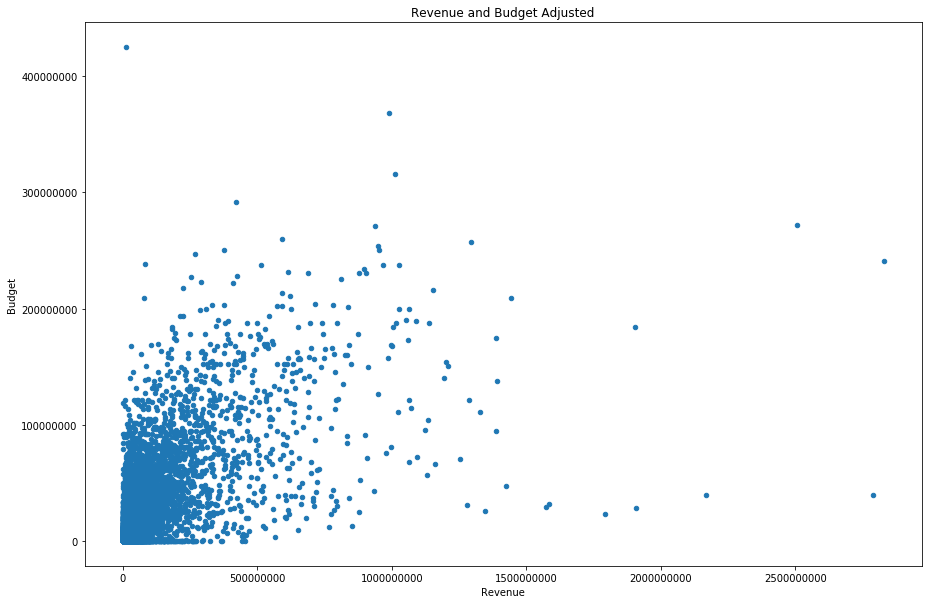

In [173]:
#Creating a SCATTER plot graph for the revenue and budget adjusted 

ax_budget1 = df_rev.plot(kind='scatter', figsize=(15,10), title = "Revenue and Budget Adjusted", x = 'revenue_adj', y = 'budget_adj')
ax_budget1.set_xlabel("Revenue")
ax_budget1.set_ylabel("Budget")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

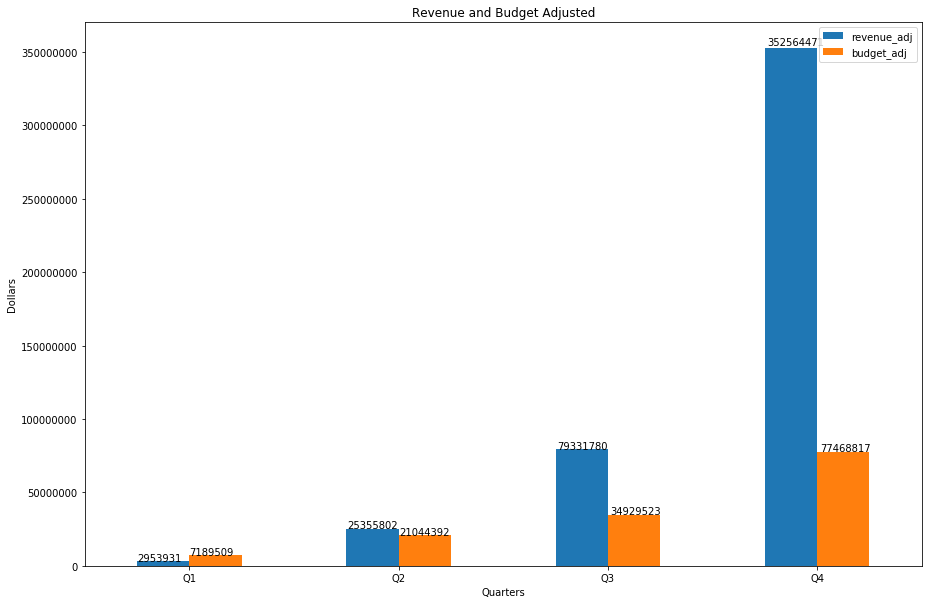

In [174]:
#Creating a new dataframe based off of the means of the budget_adj and revenue_adj per quarter and plotting the dataframe.

df_budget_final = pd.DataFrame({'name': [101,"Q2","Q3","Q4"],'revenue_adj': [2953931,25355802,79331780,352564471],'budget_adj':[7189509,21044392,34929523,77468817]})

ax_budget = df_budget_final.plot.bar(rot =0, figsize=(15,10), title = "Revenue and Budget Adjusted")
ax_budget.set_xlabel("Quarters")
ax_budget.set_ylabel("Dollars")
ax_budget.set_xticklabels(('Q1','Q2','Q3','Q4'))
plt.ticklabel_format(style='plain', axis='y')

for p in ax_budget.patches:
    ax_budget.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


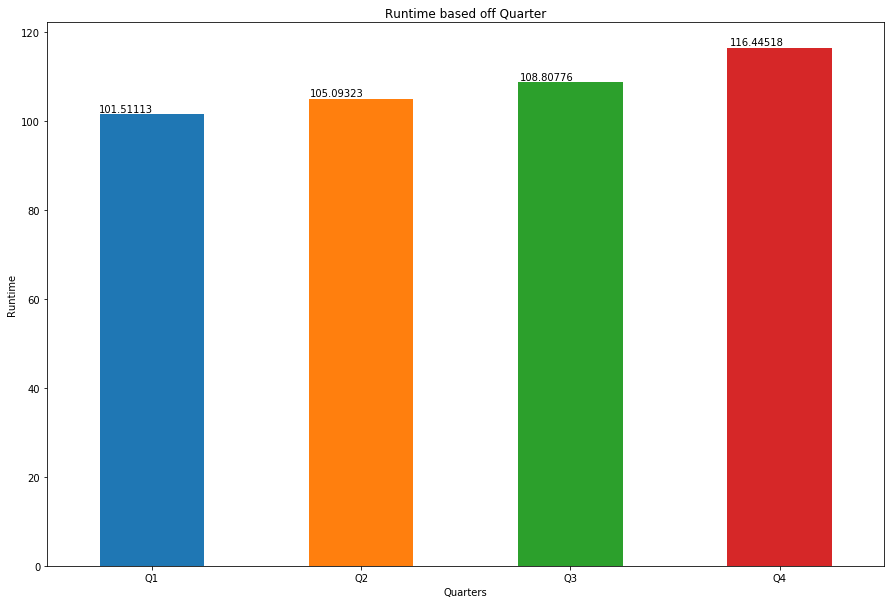

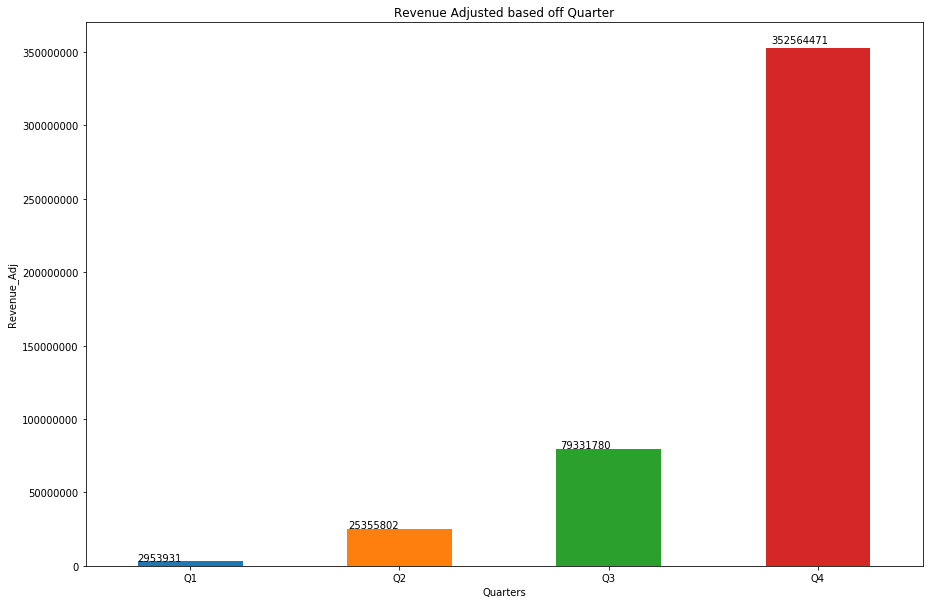

In [175]:
#Creating a new dataframe based off of the means of the runtime and revenue_adj per quarter.
#I have to create two different graphs because of how small the runtime is in comparison to the revenue_adj.

df_runtime_final = pd.DataFrame({'name': ["Q1","Q2","Q3","Q4"],'revenue_adj': [2953931,25355802,79331780,352564471],'runtime':[101.51113,105.09323,108.80776,116.44518]})

ax_runtime = df_runtime_final.plot(kind='bar', x = 'name', y = 'runtime', rot=0, legend=None, figsize=(15,10), title = "Runtime based off Quarter")
ax_runtime.set_xlabel("Quarters")
ax_runtime.set_ylabel("Runtime")
ax_runtime.set_xticklabels(('Q1','Q2','Q3','Q4'));
for p in ax_runtime.patches:
    ax_runtime.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
ax_revenue = df_runtime_final.plot(kind='bar', x = 'name', y = 'revenue_adj', rot=0, legend=None, figsize=(15,10), title = "Revenue Adjusted based off Quarter")
ax_revenue.set_xlabel("Quarters")
ax_revenue.set_ylabel("Revenue_Adj")
ax_revenue.set_xticklabels(('Q1','Q2','Q3','Q4'))
plt.ticklabel_format(style='plain', axis='y')

for p in ax_revenue.patches:
    ax_revenue.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

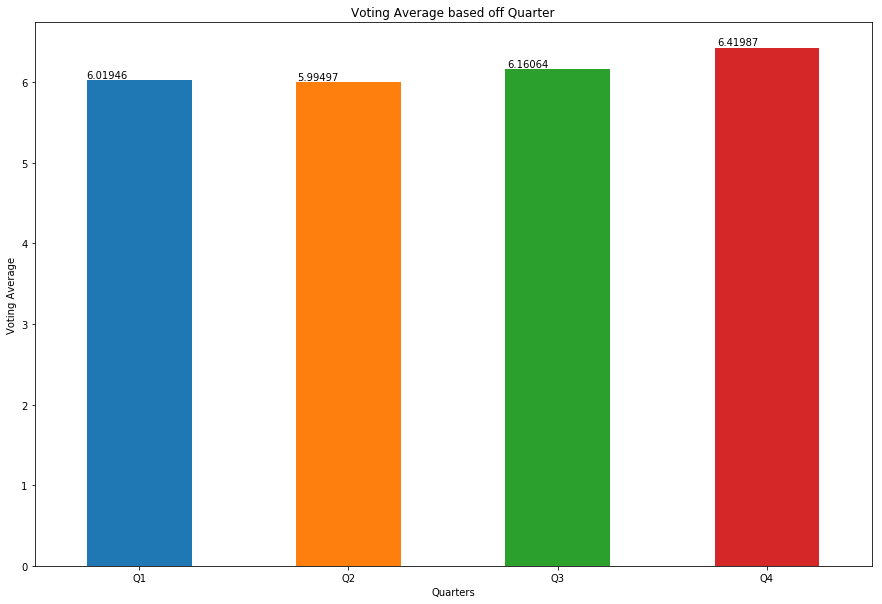

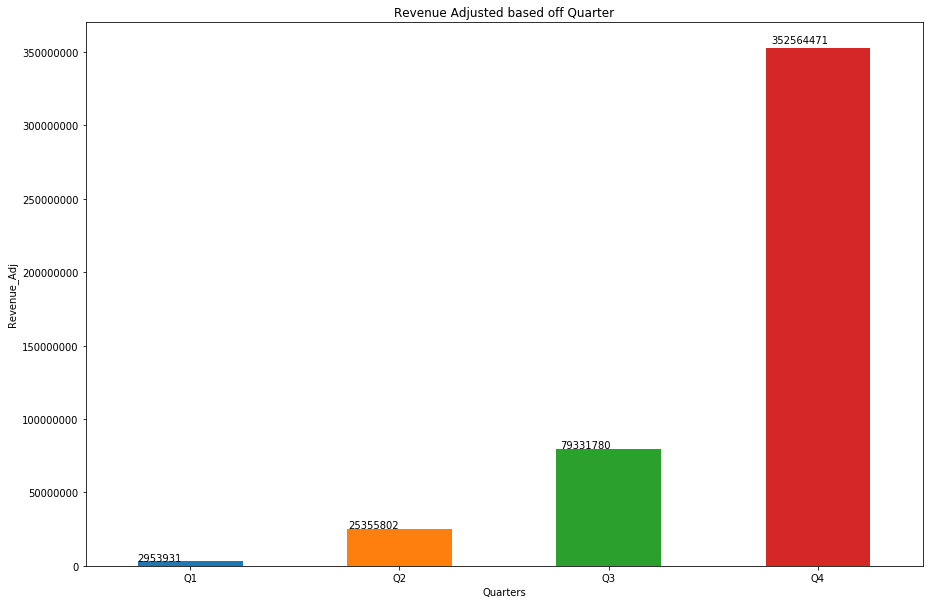

In [176]:
#Creating a new dataframe based off of the means of the voting average and revenue_adj per quarter.
#I have to create two different graphs because of how small the voting average is in comparison to the revenue_adj.

df_voting_avg_final = pd.DataFrame({'name': ["Q1","Q2","Q3","Q4"],'revenue_adj': [2953931,25355802,79331780,352564471],'voting_avg':[6.01946,5.99497,6.16064,6.41987]})

ax_voting_avg = df_voting_avg_final.plot(kind='bar', x = 'name', y = 'voting_avg', rot=0, legend=None, figsize=(15,10), title = "Voting Average based off Quarter")
ax_voting_avg.set_xlabel("Quarters")
ax_voting_avg.set_ylabel("Voting Average")
ax_voting_avg.set_xticklabels(('Q1','Q2','Q3','Q4'));
for p in ax_voting_avg.patches:
    ax_voting_avg.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
    
ax_revenue = df_voting_avg_final.plot(kind='bar', x = 'name', y = 'revenue_adj', rot=0, legend=None, figsize=(15,10), title = "Revenue Adjusted based off Quarter")
ax_revenue.set_xlabel("Quarters")
ax_revenue.set_ylabel("Revenue_Adj")
ax_revenue.set_xticklabels(('Q1','Q2','Q3','Q4'))
plt.ticklabel_format(style='plain', axis='y')

for p in ax_revenue.patches:
    ax_revenue.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.01))

### Answering the question: What kinds of properties are associated with movies that have high revenues?

For this question, I had to remove around six thousand rows because the variable revenue_adj was set to 0 and I did not want the data to be extremely skewed. I also only included revenue_adj, budget_adj, runtime, and vote_average as columns in this new dataframe.

I then separate the dataframe into four different ones based on the revenue_adj. I used describe to find the percentiles for revenue_adj and used those as delimiters.

I then plot the revenue adjusted along with the budget adjusted and see that as the budget increases so does the revenue.

I plot the runtimes and revenue and see that again, the longer the film, the more revenue has been generated.

Finally, I plot the voting average and revenue adjusted and there is a slight correlation but the voting average is around a 6.

<a id='conclusions'></a>
## Conclusions
### Genres:
>After going through and seeing what Genres were popular from year to year, I saw that the total of of movies that were classified as Drama were at the top besides for one decade where Comedy took over in the 1980s. I then looked at the variable popularity and compared the mean popularity per genre for each decade. There I found that Science Fiction was in the top 5 for almost every decade. Adventure was the top genre for the most decades(3), followed by animation(2), followed by fantasy(1).

>Here are the top 5 per decade based on popularity average:

>1960s - Animation, Adventure, Thriller, Fantasy, TV-Movie

>1970s - Adventure, Sci-Fi, Animation, Action, Fantasy

>1980s - Adventure, Sci-Fi, Action, Fantasy, Animation

>1990s - Animation, Sci-Fi, Adventure, fantasty, crime

>2000s - Fantasty, Adventure, Action, Sci-Fi, Family

>2010s - Adventure, Sci-Fi, Western, Action, Fantasy

#### Limitations:
> One limitation was not fully understanding how the popularity column is calculated. Was it based on ticket sales? There was also the limitation that 2010 was only a half of decade and only went up to 2015 instead of 2020. Another limitation is that the distribution of genres were not equal.

### Revenue:
>After going through and seeing what variables I thought would influence the Revenue Adjusted for inflation, I noticed that the budget adjusted and runtime increase along with the revenue adjusted. However the voting average goes up, but just barely. What I did was break up the dataframe into four quarters using the describe function. I then plot each column's average (Revenue, Budget, Runtime, Voting Average) and compared the results on a bar graph.
#### Limitations:
> Some limitations include the fact that around 6000 movies had their revenue_adj as 0. Thats over half of the sample size given, so perhaps our findings may not be accurate.
>There was also no indication that there was any currency conversions or exchange rate so budget and revenue could be off. There were also still a lot of movies with small amounts of budgets and revenues.

In [177]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0